In [1]:
import keras
from keras.preprocessing.text import Tokenizer
from tflearn.data_utils import to_categorical, pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Conv1D
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from __future__ import print_function
X=pd.read_csv("C:/Users/DEEPANSH/Desktop/Tweets1.csv")
x=X.Tweets
y=X.Labels
raw=x.tolist()
i=1;
final=[]
dic={'address':1}
for dil in raw:
    l=[]
    w=dil.split()
    for wo in w:
        if wo in dic.keys():
            l.append(dic.get(wo))
        else:
            i=i+1
            dic[wo]=i
            l.append(dic.get(wo))
    final.append(l)
final
Y=y
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final, Y ,random_state=1)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
# load the dataset but only keep the top n words, zero the rest
from keras.preprocessing import sequence
top_words = i+1
# pad dataset to a maximum review length in words
max_words = 150
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(LSTM(128,dropout=0.8))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Using TensorFlow backend.


curses is not supported on this machine (please install/reinstall curses for an optimal experience)
904
302
904
302


D:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 32)           220608    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               82432     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 319,681
Trainable params: 319,681
Non-trainable params: 0
_________________________________________________________________
None


In [2]:
# Fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)

Train on 904 samples, validate on 302 samples
Epoch 1/50
 - 3s - loss: 0.6924 - acc: 0.5321 - val_loss: 0.6902 - val_acc: 0.5530
Epoch 2/50
 - 2s - loss: 0.6876 - acc: 0.5332 - val_loss: 0.6823 - val_acc: 0.5066
Epoch 3/50
 - 2s - loss: 0.6703 - acc: 0.5796 - val_loss: 0.6504 - val_acc: 0.6921
Epoch 4/50
 - 2s - loss: 0.6241 - acc: 0.7423 - val_loss: 0.5880 - val_acc: 0.7152
Epoch 5/50
 - 2s - loss: 0.5578 - acc: 0.7157 - val_loss: 0.5211 - val_acc: 0.7450
Epoch 6/50
 - 2s - loss: 0.4915 - acc: 0.7898 - val_loss: 0.5042 - val_acc: 0.7483
Epoch 7/50
 - 2s - loss: 0.4155 - acc: 0.8131 - val_loss: 0.4891 - val_acc: 0.7351
Epoch 8/50
 - 2s - loss: 0.3242 - acc: 0.8728 - val_loss: 0.4322 - val_acc: 0.8013
Epoch 9/50
 - 2s - loss: 0.2849 - acc: 0.8894 - val_loss: 0.4206 - val_acc: 0.8113
Epoch 10/50
 - 2s - loss: 0.2731 - acc: 0.8816 - val_loss: 0.4591 - val_acc: 0.7781
Epoch 11/50
 - 2s - loss: 0.2090 - acc: 0.9270 - val_loss: 0.4848 - val_acc: 0.7848
Epoch 12/50
 - 2s - loss: 0.1870 - acc:

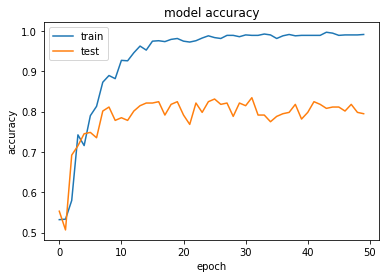

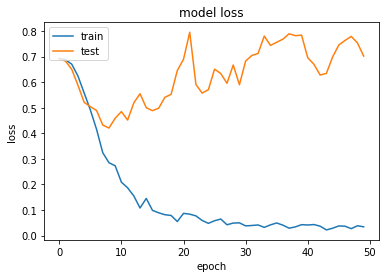

In [4]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()